<a href="https://colab.research.google.com/github/JoanraGimenez/SSN/blob/main/Tasca_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **TASCA 2: Mètodes numèrics sessió 20/2/2025**

 **1.- Revisar els exemples del mètode numèric proposat per R. Feynmann per a resoldre les equacions del moviment i la seva implementació en python (script o Google Colab) així com el material discutit a classe durant aquesta setmana.**

**a) Escriure les equacions que descriuen l'evolució de la posició i de la velocitat en aquest mètode (en general, no per un exemple específic) i compareu-les amb les equacions corresponents al mètode de velocity Verlet.**

En el primer pas del mètode de Feynman es calcula la velocitat a la meitat del pas de temps establert (dt/2) i l'usem per calcular la posicio passat un diferencial de temps, $dt$.

El mètode de Feynman calcula la nova velocitat a partir de l'acceleració i la meitat del diferencial de temps.

$v_ {0.5}=v_0+\frac{dt}{2}·a$

Per calcular la posició amb aquest mètode es fa amb el diferencial de temps complet, és a dir, $t+dt$ i usant la velocitat a mitja passa calculada anteriorment. És calcula també una nova acceleració en aquest pas. L'equació de la posició queda de la següent manera:
$x(1)=x(0)+dt·v_ {0.5}$

De forma general,

$x(i+1)=x(i)+dt·v_ {0.5}$

on $x$ només depèn de $i$ ja que la velocitat i l'acceleració canvien constantment.

Si ara per contra mirem el mètode de *velocity Verlet*, veiem que no tenim en compte la velocita a mitja passa sinó que tenim en compte tot l'interval $dt$.

En aquest cas, i a diferència del mètode de Feynman és que calculem la velocitat a partir de l'acceleració mitjana entre dos punts i la fem servir per definir la velocitat, seguint la segona llei de Newton. Les equacions que usem son:

$x(i)= x(i-1)+v(i-1)·dt+\frac{a(i-1}{2}·dt^2$
$v(i)=v(i-1)+ dt·a_m$

, on     $a_m=\frac{a(i-1)+a(i)}{2}$

Un cop vist els dos mètodes veiem quq la diferència recau en la correcció que apliquem en l'acceleració.


**b) En el programa d'exemple del mètode de Velocity Verlet (i en el del mètode d'Euler també) en cada pas de temps dt avaluem l'energia total (potencial i cinètica) per tal de verificar la conservació de l'energia. En canvi, això no està implementat en els exemples del mètode proposat per Feynmann. Perquè? Proposa una modificació que implementi aquest càlcul.**

En el mètode de Feynman no es calcula l'energia ja que estem mirant la velocitat i la posició en diferents moments de temps. Tot i això el mètode de Feynman conserva l'energia, ja que fluctua entre un màxim i un mínim.
Igual que vam fer amb els altres mètodes podem implementar un model de moviment harmònic amb el mètode de Feynman, afegint el càlcul per l'energia.
Per fer-ho hauriem de crear un bucle que ens calculi l'energia a cada pas i actualitzi els valors de posició, temps, velocitat i energia amb les expressions que hem mostrat anteriorment. Representant el quaciont entre l'energia i l'energia inicial podem veure si es compleix la conservació de l'energia.



In [1]:
# En primer lloc cal importar les llibreries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definim els paràmetres del nostre sistema
m = 1.0                # Massa
T = 1                  # Període
w = 2.0 * np.pi / T    # Freqüència
k = m * w**2           # Constant de molla

# Condicions inicials
x0 = 1.0               # Posició inicial
v0 = 0.0               # Velocitat inicial

# Energia inicial
E0 = (m / 2.0) * v0**2 + (k / 2) * x0**2

# Interval de temps
dt = 0.1              # Pas de temps
ntot = 50             # Nombre de passos

print('Temps total de simulació:', dt * ntot, 's')


Temps total de simulació: 5.0 s


In [3]:
# Inicialitzem vectors
x = np.zeros(ntot + 1)  # Posició
v = np.zeros(ntot + 1)  # Velocitat
t = np.zeros(ntot + 1)  # Temps
ER = np.zeros(ntot + 1) # Energia normalitzada

# Assignem les condicions inicials
x[0] = x0
v[0] = v0
t[0] = 0

# Acceleració inicial
a = - x[0] / m
print('a temps t=0','x=',x[0],", v=",v[0],", a=",a)

a temps t=0 x= 1.0 , v= 0.0 , a= -1.0


In [4]:
# Calculem la velocitat a mitja passa (dt/2)
v_mp = v[0] + (dt / 2.0) * a
print('v(mitja passa)=', v_mp)


v(mitja passa)= -0.05


In [ ]:
i=0
# Bucle principal per calcular l'evolució temporal
while i<ntot:

  # Actualitzem la posició
  x[i + 1] = x[i] + dt * v_mp

   # Actualitzem el temps
  t[i + 1] = t[i] + dt

    # Calculem la nova acceleració
  a = -x[i]

    # Actualitzem la velocitat a mitja passa
  v_mp= v_mp + dt * a

    #Actualitzem el contador
  i=i+1

    # Calculem l'energia total
  E = (m / 2.0) * v[i]**2 + (k / 2.0) * x[i]**2

    # Normalitzem l'energia
  ER[i] = E / E0

  print("step", i, ' t= ', round(t[i], 3), ' x=', round(x[i], 3), 'E/E0= ', ER[i])

In [ ]:
# Representem l'energia normalitzada en funció del temps
plt.plot(t, ER)
plt.xlabel('Temps (s)')
plt.ylabel('E / E0')
plt.title('Conservació de l\'energia en el mètode de Feynman')
plt.show()


L'energia pren una forma periòdica i per tant es conserva

**c) Compara la modificació proposada a (b) amb el mètode de Velocity Verlet.**

 Per comparar-ho amb el mètode de Velocity Verlet farem servi un codi, amb les mateixes condicions que abans.


In [23]:
# Massa
m = 1.0
# Període
T = 1.0
#fFreqüència
w = 2.0*np.pi/T
#Constant de força
k=m*w*w
#Condicions inicials
x0=1.0
v0=0.0
# Energia inicial
E0=(m/2.0)*v0**2+(k/2)*x0**2

In [24]:
# Diferencial de temps
dt = 0.1
# Passos totals
ntot = 16

t = np.zeros(ntot+1)
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
a = np.zeros(ntot+1)

#Condicions incials
x[0] = x0
v[0] = v0
f = -k*x[0]
a[0] = f/m


In [25]:
 #Evolució temporal

for i in range(0, ntot):
    print("step",i,' t= ',round(t[i],3),' x=',round(x[i],3))

    # Actualitzem el temps
    t[i+1] = t[i]+dt

    # Nova posició
    x[i+1] = x[i]+v[i]*dt+(1.0/2.0)*a[i]*dt*dt

    # Força a la nova posició
    f = -k*x[i+1]
    # Calcul d'acceleració
    a[i] = f/m

    # Velocitat a la nova posició
    am=(a[i]+a[i+1])/2.0
    v[i+1]= v[i]+am*dt

    #Actualitzem el temps
    t[i+1] = t[i]+dt

step 0  t=  0.0  x= 1.0
step 1  t=  0.1  x= 0.803
step 2  t=  0.2  x= 0.644
step 3  t=  0.3  x= 0.359
step 4  t=  0.4  x= 0.002
step 5  t=  0.5  x= -0.355
step 6  t=  0.6  x= -0.641
step 7  t=  0.7  x= -0.802
step 8  t=  0.8  x= -0.804
step 9  t=  0.9  x= -0.647
step 10  t=  1.0  x= -0.363
step 11  t=  1.1  x= -0.007
step 12  t=  1.2  x= 0.351
step 13  t=  1.3  x= 0.639
step 14  t=  1.4  x= 0.801
step 15  t=  1.5  x= 0.805


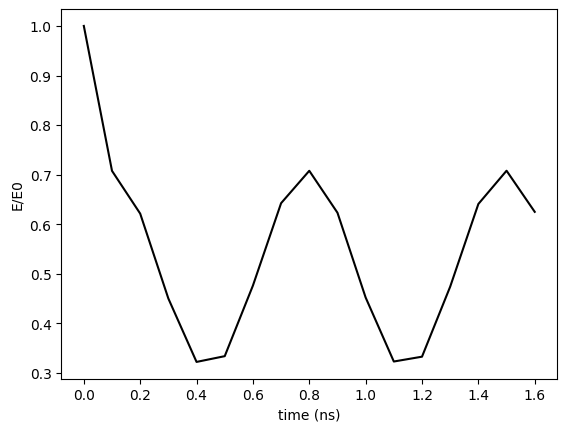

In [26]:
#Ho grafiquem:
#Energia
E=(m/2.0)*v*v+(k/2)*x*x
#Energia relativa (E/E0)
ER=E/E0
#Fem la gràfica de la relació d'energies respecte el temps
plt.plot(t,ER,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Mostrar la gràfica
plt.show()

Veiem com en aquest cas, l'energia també és periòdica pero hi ha petites variacions degudes a errors numèrics, ja que l'aproximació amb la mitjana no és exacta. Tot i això, l'energia també es conserva en aquest mètode.

**2.- Escriviu l'equació d'Schrödinger en unitats SI i en unitats atòmiques per un exemple que hagiu estudiat en les assignatures prèvies (per exemple, a Fenòmens Quantics I, II o a qualsevol altre). Podeu revisar la definició d'unitats atòmiques en qualsevol dels links sobre aquestes unitats que teniu al Campus Virtual (per exemple el link a Libre Text) o bé dels vostres apunts d'altres assignatures.**

A Fenòmens Quàntics II vam estudiar diferents pous de potencial. Un dels exemples és el d’un electró en un pou de potencial infinit i en 1D.

Si resolem l'equació d'Schrödinger en unitats SI per aquest cas, entre $x=0$ i $x=L$. podem obtenir els valors d'energies permeses:
$\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}=E\psi(x)$

$E_n=\frac{n^2\pi^2\hbar^2}{2mL^2}\space amb\space n=1,2,3,...$

Això en Sistema Internacional. Si volem expressar-ho en Unitats atòmiques haurem de tenir en compte les següents consideracions:
$\hbar=1,  m_e=1,  a_0=1 \space\space i\space\space\space   E_h=1$

Ara obtindrem el següent:

$\frac{1}{2}\frac{d^2\psi(x)}{dx^2}=E\psi(x)$
i per les energies:
$E_n=\frac{n^2\pi^2}{2L^2}\space amb\space n=1,2,3,...$

Veiem doncs que per aquest tipus de problemes, treballar amb notació d'unitats atòmiques ens simplifica les expressions.